# Projeto: Ligações para o 911

Estatística descritiva e algumas plotagens para estudo sobre chamadas do 911 (Montgomery County, PA)

Variáveis (e type) contidos na base de origem:
* lat: String, Latitude
* lng: String, Longitude
* desc: String, Descrição da Chamada
* zip: String, CEP
* título: String, Título
* timeStamp: String, AAAA-MM-DD HH: MM: SS
* twp: String, Município
* addr: String, Endereço
* e: String, ?


---
Informações de variáveis retiradas da origem (https://www.kaggle.com/datasets/mchirico/montcoalert)




## Importando libs e dados utilizadas no projeto

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Carregando dados

In [63]:
df = pd.read_csv(f'data/911.csv')

## Informações primárias sobre a tipologia e estruturação dos dados
* Vamos observar como as variáveis estão distribuidas e como são estruturadas no dataframe

---




Observar se existe alguma variável Dummy (valor unico em todo df)

In [64]:
contagem_valores_unicos = df.nunique()

print(f"Contagem de valores únicos em cada coluna: \n{contagem_valores_unicos}")

Contagem de valores únicos em cada coluna: 
lat           25949
lng           25980
desc         663282
zip             204
title           148
timeStamp    640754
twp              68
addr          41292
e                 1
dtype: int64


Verificando informações gerais do df

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Visão geral das estrutura dos dados

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Tratamento nível 1
1. Criação de novas variáveis
2. Adequação dos types das variáveis
---



Transformando a variável 'timeStamp' para um formato de data

In [67]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

Criaremos 4 novas variaveis chamadas hour, month e day_of_week, date (hora, mês, dia da semana, data)

In [68]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day_of_week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['date'] = df['timeStamp'].apply(lambda x:x.date())

In [69]:
df['day_of_week'].value_counts()

4    102942
2     99157
3     98683
1     97684
0     96745
5     89452
6     78859
Name: day_of_week, dtype: int64

Como a variável 'Day of Week' criada vem como padrão quantitativa, vamos  adicionar um outra variável categórica para fins de estudos chamada 'str_day_of_week'

In [70]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['str_day_of_week'] = df['day_of_week'].map(dict(enumerate(dias_semana)))

In [71]:
df['str_day_of_week'].value_counts()

Friday       102942
Wednesday     99157
Thursday      98683
Tuesday       97684
Monday        96745
Saturday      89452
Sunday        78859
Name: str_day_of_week, dtype: int64

Vamos criar também uma variável chamada 'reason' (motivo) que trará a razão generalizada da chamada. Essa informação vem da variável Title vide exemplo:
* EMS: BACK PAINS/INJURY

---


obs: EMS = Emergency Medical Services

In [72]:
df['reason'] = df['title'].str.split(':').str.get(0)
# aqui não foi utilizado o método map, devido a certeza de transformação entre str, sendo o metodo str.split() mais performático nesse caso em específico

In [73]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

## Tratamento nível 2
1. Exclusão de variáveis indesejadas


Retirando a variável dummy 'e'


In [74]:
# df = df.drop('e', axis=1)
# df.columns

## Análise exploratória

* Top 5 municípios

In [75]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

* Distribuição dos motivos (reasons)

<Axes: xlabel='reason', ylabel='count'>

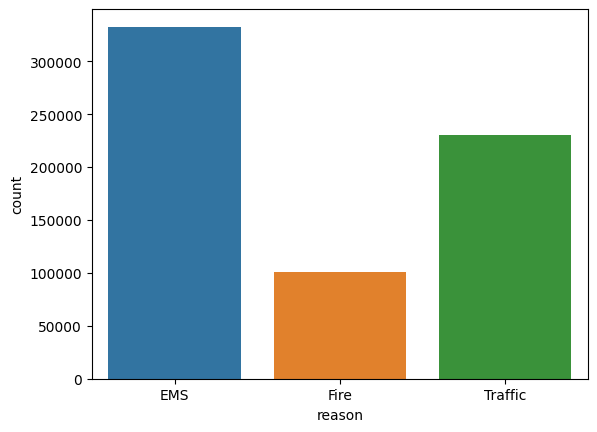

In [76]:
sns.countplot(data=df, x='reason')

* Distribuição dos motivos por dia da semana

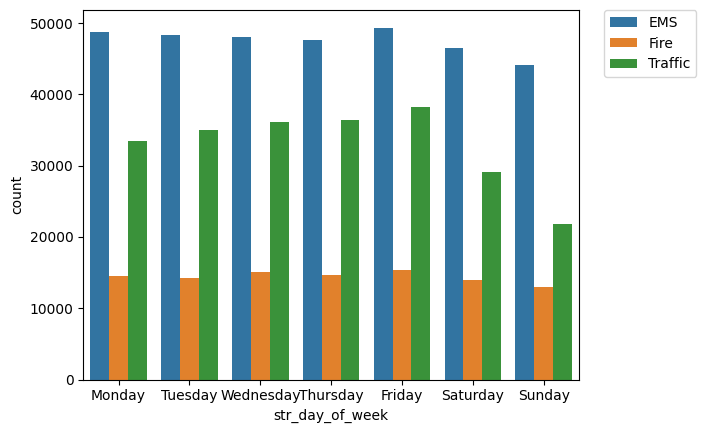

In [77]:
# Definir a ordem das categorias
ordem_dias_semana = pd.Categorical(dias_semana, categories=dias_semana, ordered=True)

sns.countplot(x='str_day_of_week', data=df, hue='reason', order=ordem_dias_semana)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* Distribuição dos motivos por mês

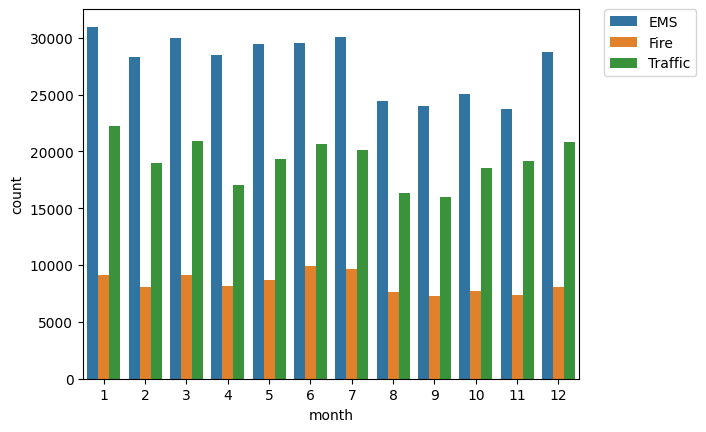

In [78]:
sns.countplot(x='month', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* Distribuição dos motivos por horas do dia

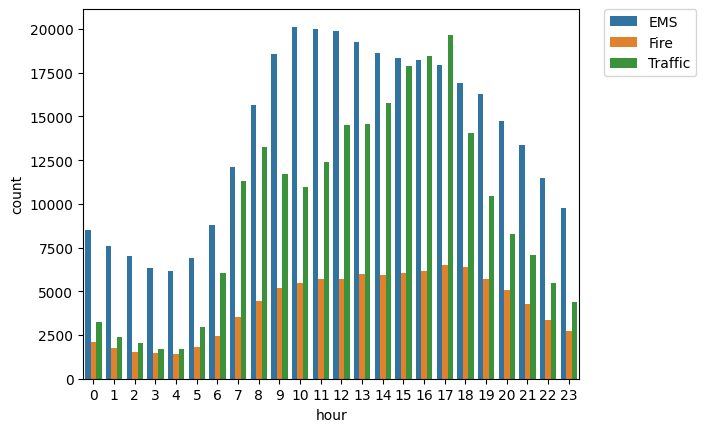

In [79]:
sns.countplot(x='hour', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Visualização de padrões por mapa de calor

### Reorganização dos dados para coluna(horas) e linha(dia da semana)

In [80]:
df_day_hour = df.groupby(by=['str_day_of_week','hour']).count()['reason'].unstack()
df_day_hour = df_day_hour.reindex(ordem_dias_semana)
df_day_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
str_day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834


Heatmap para visualizar relação entre dias da semana e horas do dia

<Axes: xlabel='hour', ylabel='str_day_of_week'>

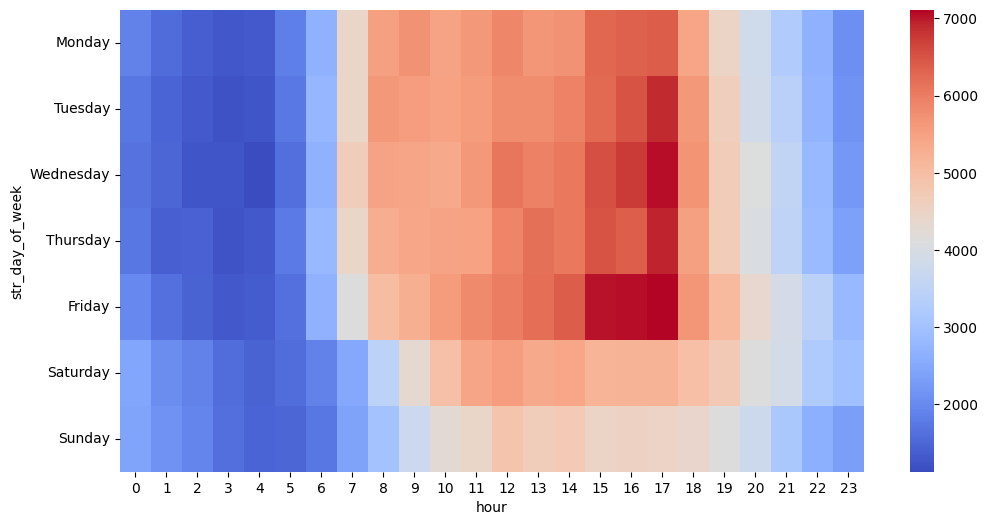

In [81]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_day_hour, cmap='coolwarm')

> Olhando o Heatmap, podemos observar que a maior quantidade de chamadas ocorre no periodo da tarde, normalmente entre os dias úteis da semana, tendo uma desaceleração nos finais de semana.



Para nos auxiliar ainda mais, podemos criar clusters dos dados, para melhor vizualização dos padrões

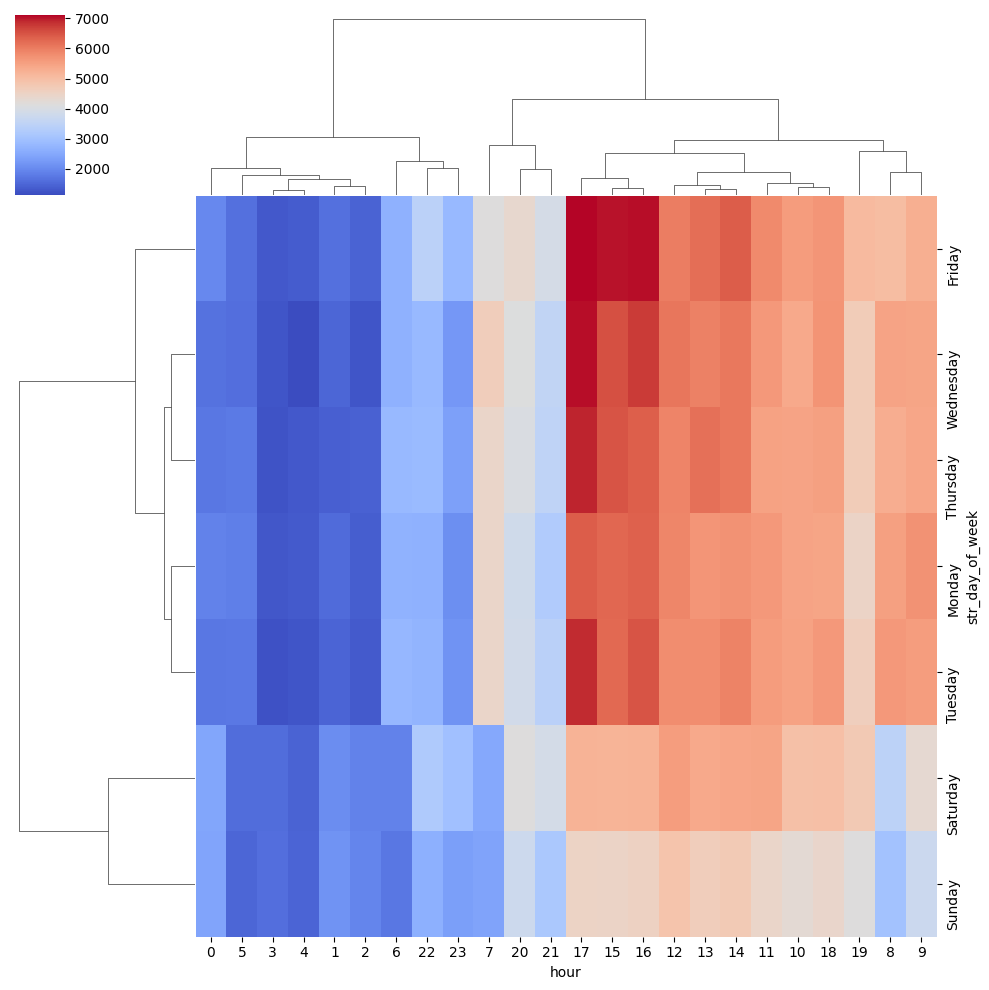

In [82]:
sns.clustermap(data=df_day_hour, cmap='coolwarm')

### Reorganização dos dados para coluna(meses) e linha(dia da semana)

In [83]:
df_day_month = df.groupby(by=['str_day_of_week','month']).count()['reason'].unstack()
df_day_month = df_day_month.reindex(ordem_dias_semana)
df_day_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
str_day_of_week,,,,,,,,,,,,
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Tuesday,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wednesday,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305


Heatmap para visualizar relação entre dias da semana e meses do ano

<Axes: xlabel='month', ylabel='str_day_of_week'>

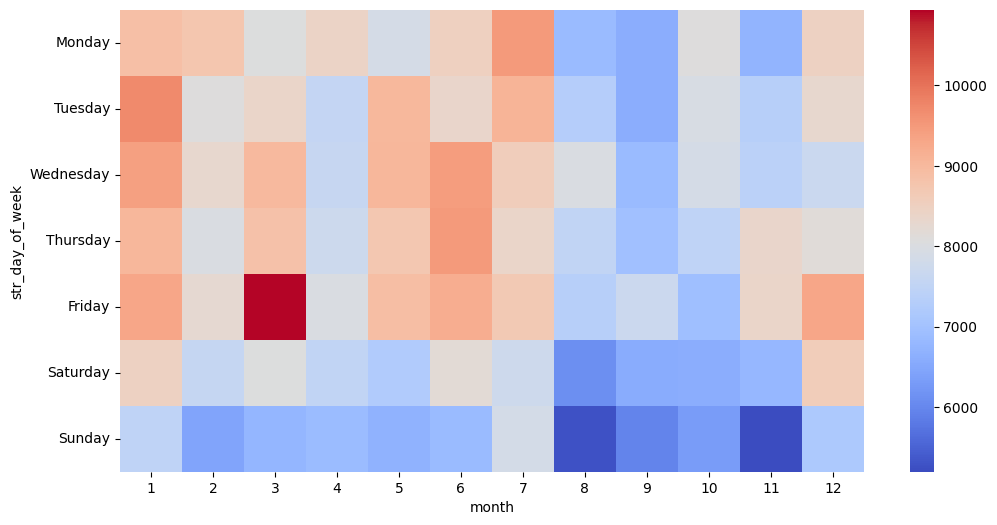

In [84]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_day_month, cmap='coolwarm')

> Olhando o Heatmap, podemos observar que a maior quantidade de chamadas ocorre no primeiro semestre do ano, normalmente entre os dias úteis da semana, tendo uma desaceleração nos finais de semana.



Para nos auxiliar ainda mais, podemos criar clusters dos dados, para melhor vizualização dos padrões

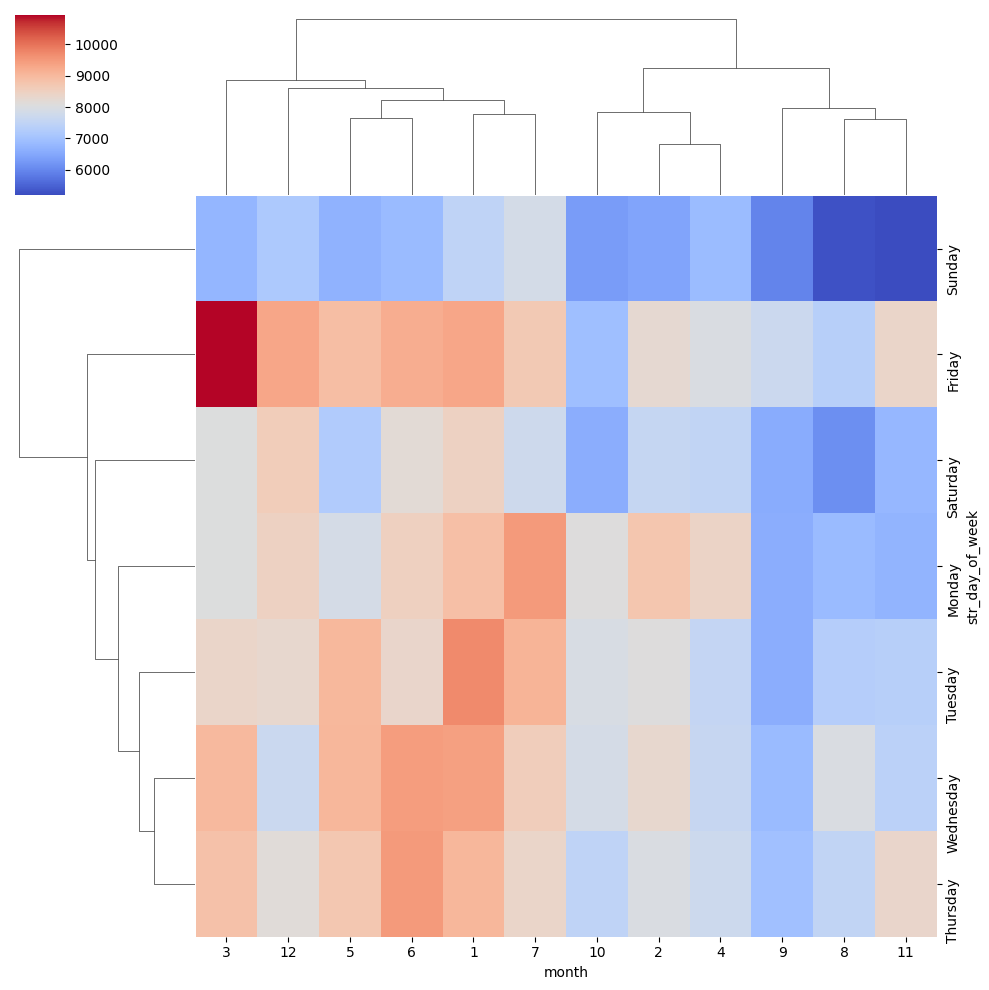

In [85]:
sns.clustermap(data=df_day_month,cmap='coolwarm')

## Visualizando no mapa
* Em construção

In [86]:
# df['id'] = range(len(df))
# df.info()

In [87]:
# def draw_map(df):
#     # Map
#     calls = df[['id', 'lat', 'lng', 'reason', 'ex']].copy()

#     calls['ex'] = calls['ex'].astype('int')

#     fig = px.scatter_mapbox(calls,
#                             lat="lat",
#                             lon="lng",
#                             color="reason",
#                             color_continuous_scale=px.colors.cyclical.IceFire,
#                             size_max=15,
#                             zoom=10)

#     fig.update_layout(mapbox_style="open-street-map")
#     fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
#     return fig

In [88]:
# fig = draw_map(df)
# fig.show()